- CRIM: per capita crime rate by town / 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- TARGET: Median value of owner-occupied homes in $1000's

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [75]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [90]:
dataset = pd.read_csv("C:/formacao_dataScience_DSA_DADOS/04_machineLearning/Cap05_Regressao_pt2/dados/PY/BostonHousing.csv")

In [91]:
dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [92]:
dataset = dataset.rename(columns = {'medv': "target"})

In [93]:
# Gerando número de observações e variáveis 
observations = len(dataset)
variables = dataset.columns[:-1]

In [94]:
observations

506

In [95]:
dataset = dataset.dropna(subset=['rm'])

In [96]:
# Coletando X e Y
X = dataset.iloc[:-1]


In [97]:
dataset = dataset.drop(dataset.index[-1])

y = dataset['target'].values

In [98]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


### UTILIZANDO MÚLTIPLOS ATRIBUTOS com StatsModels

In [100]:
Xc = sm.add_constant(X) #Adicionando constante pq o Stats models solicita

In [101]:
modelo = sm.OLS(y, Xc)
modelo_v1 = modelo.fit()

In [108]:
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.764e+30
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        14:32:41   Log-Likelihood:                 14817.
No. Observations:                 500   AIC:                        -2.960e+04
Df Residuals:                     485   BIC:                        -2.954e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.217e-14   3.78e-14     -1.646      0.1

Não podemos apenas confiar na avaliação do valor P, devemos ver inclusive a correlação

## Matriz de Correlção

In [106]:
X = dataset.iloc[:,:-1]
matriz_corr = X.corr()
matriz_corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.201960,0.407714,-0.057275,0.420823,-0.219801,0.355232,-0.381289,0.624825,0.582050,0.293170,-0.383836,0.457031
zn,-0.201960,1.000000,-0.536648,-0.043490,-0.518094,0.310935,-0.569514,0.665445,-0.315873,-0.317058,-0.392446,0.177038,-0.414751
indus,0.407714,-0.536648,1.000000,0.062418,0.762930,-0.394168,0.646190,-0.709877,0.598530,0.721459,0.382904,-0.357991,0.606021
chas,-0.057275,-0.043490,0.062418,1.000000,0.090465,0.091289,0.087647,-0.099075,-0.009422,-0.037615,-0.121363,0.050229,-0.054091
nox,0.420823,-0.518094,0.762930,0.090465,1.000000,-0.302687,0.732922,-0.771225,0.612855,0.667657,0.188734,-0.379860,0.592230
rm,-0.219801,0.310935,-0.394168,0.091289,-0.302687,1.000000,-0.240049,0.203169,-0.211662,-0.293605,-0.357305,0.128469,-0.616555
age,0.355232,-0.569514,0.646190,0.087647,0.732922,-0.240049,1.000000,-0.751390,0.461485,0.509469,0.263886,-0.275859,0.602086
dis,-0.381289,0.665445,-0.709877,-0.099075,-0.771225,0.203169,-0.751390,1.000000,-0.499842,-0.536294,-0.230414,0.292554,-0.502390
rad,0.624825,-0.315873,0.598530,-0.009422,0.612855,-0.211662,0.461485,-0.499842,1.000000,0.910799,0.471248,-0.442982,0.490859
tax,0.582050,-0.317058,0.721459,-0.037615,0.667657,-0.293605,0.509469,-0.536294,0.910799,1.000000,0.465563,-0.440550,0.545210


In [109]:
# Criando a plotagem da correlação
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

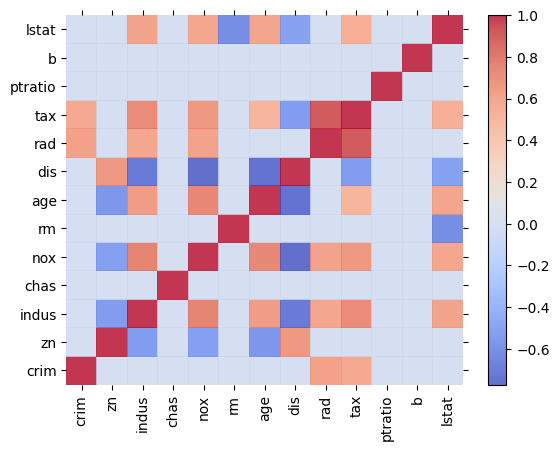

In [113]:
visualize_correlation_matrix(X, hurdle = 0.5)

# Avaliando Multicolinearidade

## Autovalores (Eigenvalues) e Autovetores (Eigenvectors)

Uma forma ainda mais automática de detectar associações multicolineares (e descobrir problemas numéricos em uma inversão de matriz) é usar autovetores. Explicados em termos simples, os autovetores são uma maneira muito inteligente de recombinar a variância entre as variáveis, criando novos recursos acumulando toda a variância compartilhada. Tal recombinação pode ser obtida usando a função NumPy linalg.eig, resultando em um vetor de autovalores (representando a quantidade de variância recombinada para cada nova variável) e autovetores (uma matriz nos dizendo como as novas variáveis se relacionam com as antigas).



In [114]:
# Gerando Autovalores (eigenvalues) e Autovetores (eigenvectors)

corr = np.corrcoef(X, rowvar = 0)
autovalores, autovetores = np.linalg.eig(corr)

Depois de extrair os autovalores, imprimimos em ordem decrescente e procuramos qualquer elemento cujo valor seja próximo de zero ou pequeno em comparação com os outros. Valores próximos a zero podem representar um problema real para equações normais e outros métodos de otimização baseados na inversão matricial. Valores pequenos representam uma fonte elevada, mas não crítica, de multicolinearidade. Se você detectar qualquer um desses valores baixos, anote a posição no vetor (lembre-se que os índices em Python começam por zero).

O menor valor está na posição 8. Vamos buscar a posição 8 no autovetor.

In [121]:
print(autovalores)

[6.14345234 1.43434619 1.2368489  0.85820548 0.8323553  0.65811049
 0.53510924 0.39445268 0.0635044  0.27225275 0.21789946 0.16870951
 0.18475326]


Usando a posição do indice na lista de autovalores, podemos encontrar o vetor específico nos autovalores que contém as variáveis carregadas, ou seja, nível de associaão com os valores originais. No Autovetor, observamos valores nas posições 2,8 e 0, que estão em destaque em termos de valor absoluto

In [118]:
autovetores[:,8]

array([-0.04577727,  0.07907335,  0.24952761, -0.03580096, -0.04041681,
       -0.04449296,  0.03853431,  0.02416871,  0.63458617, -0.72012594,
       -0.02376638,  0.00469535, -0.02358133])

Agora nós imprimimos os nomes das variáveis para saber quais contribuem mais com seus valores para construir o autovetor. Associamos o vetor de variáveis com o eigenvector.

In [119]:
print(variables[2], variables[8], variables[9])

indus rad tax


Com isso, encontramos os culpados da multicolinearidade. A remoção de uma ou mais destas geralmente é a melhor resposta

# GRADIENTE DESCENDENTE

In [122]:
# Gerando os dados
observations = len(dataset)
variable = dataset.columns

### Featura Scaling

Podemos aplicar Feature Scaling através de Padronização ou Normalização. Normalização aplica escala aos dados com intervalos entre 0 e 1. A Padronização divide a média pelo desvio padrão para obter uma unidade de variância. Vamos usar a Padronização (StandardScaler) pois nesse caso esta técnica ajusta os coeficientes e torna a superfície de erros mais "tratável".

In [123]:
# Aplicando Padronização 
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_mstd = standardization.scale_

In [124]:
# Gerando X e Y
Xst = np.column_stack((Xst,np.ones(observations)))
y = dataset['target'].values

In [125]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path                 

In [126]:
# Imprimindo o resultado                           
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("Coeficientes finais padronizados: " + ', '.join(map(lambda x: "%0.4f" % x, w)))            

Coeficientes finais padronizados: -0.9285, 1.0915, 0.0951, 0.6734, -2.0644, 2.6460, 0.0720, -3.1493, 2.6229, -2.0930, -2.0296, 0.8514, -3.8040, 22.5826


In [127]:
# Desfazendo a Padronização
unstandardized_betas = w[:-1] / original_mstd
unstandardized_bias  = w[-1]-np.sum((original_means / original_mstd) * w[:-1])

In [128]:
# Imprimindo o resultado
print ('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables):
    print ('%8s: %8.4f' % (varname, beta))

    bias:  36.8019
    crim:  -0.1075
      zn:   0.0466
   indus:   0.0139
    chas:   2.6391
     nox: -17.7688
      rm:   3.7505
     age:   0.0026
     dis:  -1.4978
     rad:   0.3006
     tax:  -0.0124
 ptratio:  -0.9382
       b:   0.0093
   lstat:  -0.5313


## Importância dos Atributos 

In [130]:
# Criando um modelo
modelo = linear_model.LinearRegression(fit_intercept = True)

In [131]:
# Treinando o modelo com dados não padronizados (em escalas diferentes)
modelo.fit(X,y)

LinearRegression()

In [132]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, modelo.coef_), dataset.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

17.769 nox
 3.751 rm
 2.639 chas
 1.498 dis
 0.938 ptratio
 0.531 lstat
 0.301 rad
 0.108 crim
 0.047 zn
 0.014 indus
 0.012 tax
 0.009 b
 0.003 age


Podemos ver a discrepância quando não padronizamos os dados

In [136]:
# Padronizando os dados
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, modelo)

# UTILIZEI make_papeline para padronizar os dados e já treinar

In [137]:
# Treinando o modelo com dados padronizados (na mesma escala)
Stand_coef_linear_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [138]:
# Imprimindo os coeficientes e as variáveis com os dados já padronizados - COMPARE COM O ANTERIOR
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

 3.804 lstat
 3.149 dis
 2.646 rm
 2.623 rad
 2.093 tax
 2.064 nox
 2.030 ptratio
 1.091 zn
 0.929 crim
 0.851 b
 0.673 chas
 0.095 indus
 0.072 age


## Utilizando R SQUARE

In [139]:
modelo = linear_model.LinearRegression(fit_intercept= True)

In [140]:
# FUNÇÃO PARA ENCONTRAR O R2

def r2_est(X,y):
    return r2_score(y, modelo.fit(X,y).predict(X))

In [141]:
print ('Coeficiente R2: %0.3f' %  r2_est(X,y))

Coeficiente R2: 0.743


Ou seja, as variáveis de entrada impactam e 74,3% a variável target

In [142]:
# Gera o impacto de cada atributo no R2
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - r2_est(X.values[:,selection],y)), dataset.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse = True):
    print ('%6.3f %s' %  (imp, varname))

 0.057 lstat
 0.042 rm
 0.029 dis
 0.027 ptratio
 0.011 nox
 0.011 rad
 0.006 b
 0.006 zn
 0.006 tax
 0.006 crim
 0.005 chas
 0.000 indus
 0.000 age


Podemos ver que RAD e TAX, que possuem multicolinearidade, não contribuiram de forma significativa com o RSQUARE, ou seja, não causam grande impacto no target, haja vista que passam a mesma informação basicamente

# FAZENDO PREVISÕES COM O MODELO

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
print("Boston housing dataset tem {} observações com {} variáveis cada uma.".format(*dataset.shape))

Boston housing dataset tem 500 observações com 14 variáveis cada uma.


In [146]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [148]:
# Coletando x e y
# Usaremos como variáveis explanatórias somente as 4 variáveis mais relevantes
X = dataset[['lstat', 'rm', 'dis', 'rad']] # possuem mais relevância
y = dataset['target'].values

In [149]:
X.head()

,lstat,rm,dis,rad
0,4.98,6.575,4.0900,1
1,9.14,6.421,4.9671,2
2,4.03,7.185,4.9671,2
3,2.94,6.998,6.0622,3
4,5.33,7.147,6.0622,3


In [150]:
# Divisão em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [151]:
# Cria o modelo
modelo = linear_model.LinearRegression(fit_intercept = True)

In [152]:
# Treina o modelo
modelo_v2 = modelo.fit(X_train, y_train)

In [153]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test, modelo_v2.fit(X_train, y_train).predict(X_test))

0.6251319965467801

### PREVISÕES

In [154]:

LSTAT = 5
RM = 8
DIS = 6
PTRATIO = 19

# Lista com os valores das variáveis
dados_nova_casa = [LSTAT, RM, DIS, PTRATIO]

# Reshape
Xp = np.array(dados_nova_casa).reshape(1, -1)

# Previsão
print("Taxa Média de Ocupação Para a Casa:", modelo_v2.predict(Xp))

Taxa Média de Ocupação Para a Casa: [33.92142659]
